In [ ]:
!pip install umap-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import requests
import re
from statistics import mean, median
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import DBSCAN, KMeans, SpectralClustering, Birch
import umap

In [ ]:
df = pd.concat([pd.read_csv('X.csv', index_col = 'Unnamed: 0'), pd.read_csv('y.csv')], axis = 1)[['MolecularWeight', 'TPSA', 'Charge',
       'AtomStereoCount', 'BondStereoCount', 'CovalentUnitCount', 'nAcid',
       'naAromAtom', 'nB', 'nN', 'nS', 'nP', 'nF', 'nCl', 'nBr', 'nI', 'RI']]

In [ ]:
df.columns

Index(['MolecularWeight', 'TPSA', 'Charge', 'AtomStereoCount',
       'BondStereoCount', 'CovalentUnitCount', 'nAcid', 'naAromAtom', 'nB',
       'nN', 'nS', 'nP', 'nF', 'nCl', 'nBr', 'nI', 'RI'],
      dtype='object')

In [ ]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
df_pca = sklearn_pca.fit_transform(df)

sum(sklearn_pca.explained_variance_ratio_)

0.8571392412122275

In [ ]:
import umap.umap_ as umap
reducer = umap.UMAP(n_components=2)
df_umap = reducer.fit_transform(df)
len(df_umap)

2243

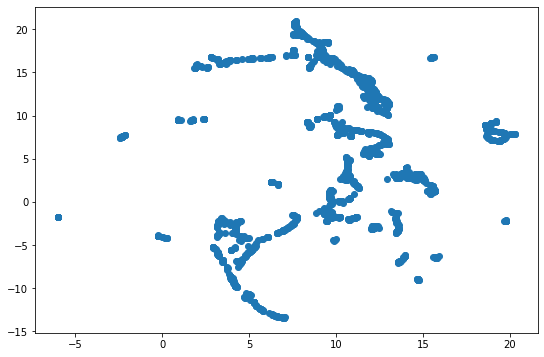

In [32]:
plt.scatter(df_umap[:, 0], df_umap[:, 1])

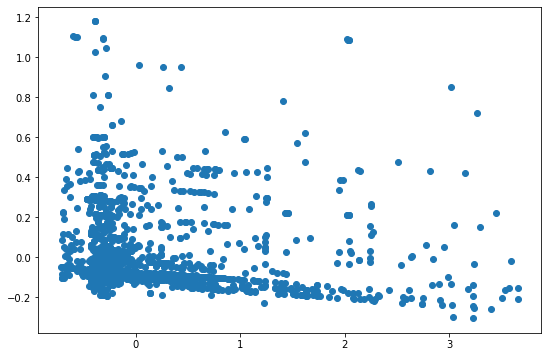

In [33]:
plt.scatter(df_pca[:, 0], df_pca[:, 1])

# DBSCAN

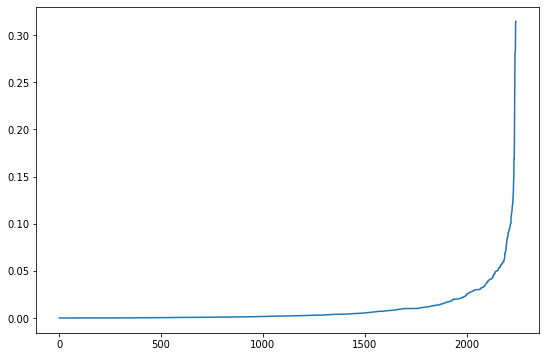

In [34]:
from sklearn.neighbors import NearestNeighbors 
neighb = NearestNeighbors(n_neighbors=2) 
nbrs=neighb.fit(df_pca)
distances,indices=nbrs.kneighbors(df_pca) 
distances = np.sort(distances, axis = 0)
distances = distances[:, 1] 
plt.rcParams['figure.figsize'] = (9,6) 
plt.plot(distances) 
plt.show() 

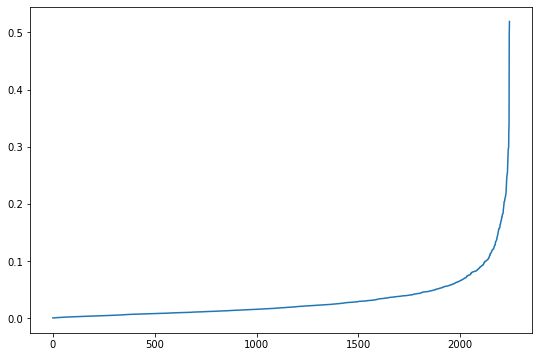

In [40]:
neighb = NearestNeighbors(n_neighbors=2) 
nbrs=neighb.fit(df_umap)
distances,indices=nbrs.kneighbors(df_umap) 
distances = np.sort(distances, axis = 0)
distances = distances[:, 1] 
plt.rcParams['figure.figsize'] = (9,6) 
plt.plot(distances) 
plt.show() 

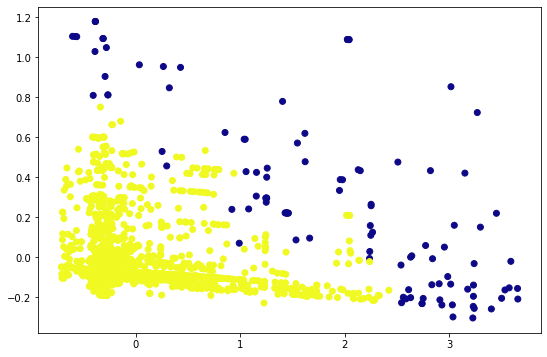

In [39]:
dbscan = DBSCAN(eps = 0.15, min_samples = 10).fit(df_pca) 
labels = dbscan.labels_ 
plt.scatter(df_pca[:, 0], df_pca[:,1], c = labels, cmap= "plasma") 
plt.show() 

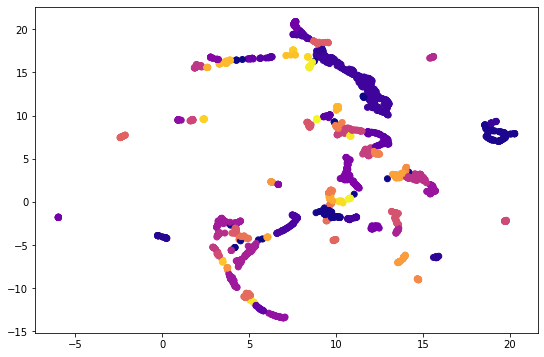

In [48]:
dbscan = DBSCAN(eps = 0.3, min_samples = 5).fit(df_umap) 
labels = dbscan.labels_ 
plt.scatter(df_umap[:, 0], df_umap[:,1], c = labels, cmap= "plasma") 
plt.show() 